# Classifying Physical Activity 

The following analysis will dissect the data from three devices across 19 activies and eight subjects. Each device collects three measurements on x, y, and z axes. These measurements are snapped five times per second for five minutes. These devices measure acceleration (accelerometer), rotation (gyrometer), and magnetic field (magentometer). Several unsupervised learning models are developed to determine if we are able to classify activities based on these measurements.

The 19 activites are as follows:

1)sitting,

2)standing,

3)lying on back,

4)lying on right side,

5)ascending stairs,

6)descending stairs,

7)standing in an elevator still,

8)moving around in an elevator,

9)walking in a parking lot,

10)walking on a treadmill with a speed of 4 km/h no incline,

11)walking on a treadmill with a speed of 4 km/h with 15 deg incline,

12)running on a treadmill with a speed of 8 km/h,

13)exercising on a stepper,

14)exercising on a cross trainer,

15)cycling on an exercise bike in horizontal position,

16)cycling on an exercise bike in vertical position,

17)rowing,

18)jumping,

19)playing basketball.



## Data Importation
So let's get analyzing. This dataset required a lot of work to load and organize it. The next several cells are repetitive, but necessary for the rest of the project. Feel free to get scrolling to the good stuff.

In [133]:
import os
import glob
import pandas as pd
import numpy as np
from pathlib import Path
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import GridSearchCV
from itertools import *

%matplotlib inline

In [134]:
#Each folder for each patient had to be loaded separately. Here we have all the activities loaded for patient/subject 1
def _reader(a19p1):
    return pd.read_csv(a19p1, sep=',', header=None, encoding='latin_1')

folder = Path("a19p1")
df19p1 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a18p1):
    return pd.read_csv(a18p1, sep=',', header=None, encoding='latin_1')

folder = Path("a18p1")
df18p1 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a17p1):
    return pd.read_csv(a17p1, sep=',', header=None, encoding='latin_1')

folder = Path("a17p1")
df17p1 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a16p1):
    return pd.read_csv(a16p1, sep=',', header=None, encoding='latin_1')

folder = Path("a16p1")
df16p1 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a15p1):
    return pd.read_csv(a15p1, sep=',', header=None, encoding='latin_1')

folder = Path("a15p1")
df15p1 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a14p1):
    return pd.read_csv(a14p1, sep=',', header=None, encoding='latin_1')

folder = Path("a14p1")
df14p1 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a13p1):
    return pd.read_csv(a13p1, sep=',', header=None, encoding='latin_1')

folder = Path("a13p1")
df13p1 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a12p1):
    return pd.read_csv(a12p1, sep=',', header=None, encoding='latin_1')

folder = Path("a12p1")
df12p1 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a11p1):
    return pd.read_csv(a11p1, sep=',', header=None, encoding='latin_1')

folder = Path("a11p1")
df11p1 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a10p1):
    return pd.read_csv(a10p1, sep=',', header=None, encoding='latin_1')

folder = Path("a10p1")
df10p1 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a09p1):
    return pd.read_csv(a09p1, sep=',', header=None, encoding='latin_1')

folder = Path("a09p1")
df09p1 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a08p1):
    return pd.read_csv(a08p1, sep=',', header=None, encoding='latin_1')

folder = Path("a08p1")
df08p1 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a07p1):
    return pd.read_csv(a07p1, sep=',', header=None, encoding='latin_1')

folder = Path("a07p1")
df07p1 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a06p1):
    return pd.read_csv(a06p1, sep=',', header=None, encoding='latin_1')

folder = Path("a06p1")
df06p1 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a05p1):
    return pd.read_csv(a05p1, sep=',', header=None, encoding='latin_1')

folder = Path("a05p1")
df05p1 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a04p1):
    return pd.read_csv(a04p1, sep=',', header=None, encoding='latin_1')

folder = Path("a04p1")
df04p1 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a03p1):
    return pd.read_csv(a03p1, sep=',', header=None, encoding='latin_1')

folder = Path("a03p1")
df03p1 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a02p1):
    return pd.read_csv(a02p1, sep=',', header=None, encoding='latin_1')

folder = Path("a02p1")
df02p1 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a01p1):
    return pd.read_csv(a01p1, sep=',', header=None, encoding='latin_1')

folder = Path("a01p1")
df01p1 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

In [135]:
#The features are loaded without column labels, so here we name each column according to body part and measuring device.
#For example, 'T_xacc' is the x-axis measurement for the accelorometer measuring the torso.
df19p1.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df18p1.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df17p1.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df16p1.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df15p1.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df14p1.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df13p1.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df12p1.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df11p1.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df10p1.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df09p1.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df08p1.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df07p1.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df06p1.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df05p1.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df04p1.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df03p1.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df02p1.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df01p1.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']

In [136]:
#In order to conduct analysis and modeling, we want the data that would have been categorical to be encoded. 
#Here we create a new column with the activities and label accordingly and we create a new column with patient 1 for the corresponding data.
df19p1['activity'] = 19
df18p1['activity'] = 18
df17p1['activity'] = 17
df16p1['activity'] = 16
df15p1['activity'] = 15
df14p1['activity'] = 14
df13p1['activity'] = 13
df12p1['activity'] = 12
df11p1['activity'] = 11
df10p1['activity'] = 10
df09p1['activity'] = 9
df08p1['activity'] = 8
df07p1['activity'] = 7
df06p1['activity'] = 6
df05p1['activity'] = 5
df04p1['activity'] = 4
df03p1['activity'] = 3
df02p1['activity'] = 2
df01p1['activity'] = 1

df19p1['patient'] = 1
df18p1['patient'] = 1
df17p1['patient'] = 1
df16p1['patient'] = 1
df15p1['patient'] = 1
df14p1['patient'] = 1
df13p1['patient'] = 1
df12p1['patient'] = 1
df11p1['patient'] = 1
df10p1['patient'] = 1
df09p1['patient'] = 1
df08p1['patient'] = 1
df07p1['patient'] = 1
df06p1['patient'] = 1
df05p1['patient'] = 1
df04p1['patient'] = 1
df03p1['patient'] = 1
df02p1['patient'] = 1
df01p1['patient'] = 1

In [137]:
#We now repeat the process for patient/subject 2
def _reader(a19p2):
    return pd.read_csv(a19p2, sep=',', header=None, encoding='latin_1')

folder = Path("a19p2")
df19p2 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a18p2):
    return pd.read_csv(a18p2, sep=',', header=None, encoding='latin_1')

folder = Path("a18p2")
df18p2 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a17p2):
    return pd.read_csv(a17p2, sep=',', header=None, encoding='latin_1')

folder = Path("a17p2")
df17p2 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a16p2):
    return pd.read_csv(a16p2, sep=',', header=None, encoding='latin_1')

folder = Path("a16p2")
df16p2 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a15p2):
    return pd.read_csv(a15p2, sep=',', header=None, encoding='latin_1')

folder = Path("a15p2")
df15p2 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a14p2):
    return pd.read_csv(a14p2, sep=',', header=None, encoding='latin_1')

folder = Path("a14p2")
df14p2 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a13p2):
    return pd.read_csv(a13p2, sep=',', header=None, encoding='latin_1')

folder = Path("a13p2")
df13p2 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a12p2):
    return pd.read_csv(a12p2, sep=',', header=None, encoding='latin_1')

folder = Path("a12p2")
df12p2 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a11p2):
    return pd.read_csv(a11p2, sep=',', header=None, encoding='latin_1')

folder = Path("a11p2")
df11p2 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a10p2):
    return pd.read_csv(a10p2, sep=',', header=None, encoding='latin_1')

folder = Path("a10p2")
df10p2 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a09p2):
    return pd.read_csv(a09p2, sep=',', header=None, encoding='latin_1')

folder = Path("a09p2")
df09p2 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a08p2):
    return pd.read_csv(a08p2, sep=',', header=None, encoding='latin_1')

folder = Path("a08p2")
df08p2 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a07p2):
    return pd.read_csv(a07p2, sep=',', header=None, encoding='latin_1')

folder = Path("a07p2")
df07p2 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a06p2):
    return pd.read_csv(a06p2, sep=',', header=None, encoding='latin_1')

folder = Path("a06p2")
df06p2 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a05p2):
    return pd.read_csv(a05p2, sep=',', header=None, encoding='latin_1')

folder = Path("a05p2")
df05p2 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a04p2):
    return pd.read_csv(a04p2, sep=',', header=None, encoding='latin_1')

folder = Path("a04p2")
df04p2 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a03p2):
    return pd.read_csv(a03p2, sep=',', header=None, encoding='latin_1')

folder = Path("a03p2")
df03p2 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a02p2):
    return pd.read_csv(a02p2, sep=',', header=None, encoding='latin_1')

folder = Path("a02p2")
df02p2 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a01p2):
    return pd.read_csv(a01p2, sep=',', header=None, encoding='latin_1')

folder = Path("a01p2")
df01p2 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

In [138]:
df19p2.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df18p2.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df17p2.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df16p2.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df15p2.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df14p2.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df13p2.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df12p2.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df11p2.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df10p2.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df09p2.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df08p2.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df07p2.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df06p2.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df05p2.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df04p2.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df03p2.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df02p2.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df01p2.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']

In [139]:
df19p2['activity'] = 19
df18p2['activity'] = 18
df17p2['activity'] = 17
df16p2['activity'] = 16
df15p2['activity'] = 15
df14p2['activity'] = 14
df13p2['activity'] = 13
df12p2['activity'] = 12
df11p2['activity'] = 11
df10p2['activity'] = 10
df09p2['activity'] = 9
df08p2['activity'] = 8
df07p2['activity'] = 7
df06p2['activity'] = 6
df05p2['activity'] = 5
df04p2['activity'] = 4
df03p2['activity'] = 3
df02p2['activity'] = 2
df01p2['activity'] = 1

df19p2['patient'] = 2
df18p2['patient'] = 2
df17p2['patient'] = 2
df16p2['patient'] = 2
df15p2['patient'] = 2
df14p2['patient'] = 2
df13p2['patient'] = 2
df12p2['patient'] = 2
df11p2['patient'] = 2
df10p2['patient'] = 2
df09p2['patient'] = 2
df08p2['patient'] = 2
df07p2['patient'] = 2
df06p2['patient'] = 2
df05p2['patient'] = 2
df04p2['patient'] = 2
df03p2['patient'] = 2
df02p2['patient'] = 2
df01p2['patient'] = 2

In [141]:
#And now patient 3
def _reader(a19p3):
    return pd.read_csv(a19p3, sep=',', header=None, encoding='latin_1')

folder = Path("a19p3")
df19p3 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a18p3):
    return pd.read_csv(a18p3, sep=',', header=None, encoding='latin_1')

folder = Path("a18p3")
df18p3 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a17p3):
    return pd.read_csv(a17p3, sep=',', header=None, encoding='latin_1')

folder = Path("a17p3")
df17p3 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a16p3):
    return pd.read_csv(a16p3, sep=',', header=None, encoding='latin_1')

folder = Path("a16p3")
df16p3 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a15p3):
    return pd.read_csv(a15p3, sep=',', header=None, encoding='latin_1')

folder = Path("a15p3")
df15p3 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a14p3):
    return pd.read_csv(a14p3, sep=',', header=None, encoding='latin_1')

folder = Path("a14p3")
df14p3 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a13p3):
    return pd.read_csv(a13p3, sep=',', header=None, encoding='latin_1')

folder = Path("a13p3")
df13p3 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a12p3):
    return pd.read_csv(a12p3, sep=',', header=None, encoding='latin_1')

folder = Path("a12p3")
df12p3 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a11p3):
    return pd.read_csv(a11p3, sep=',', header=None, encoding='latin_1')

folder = Path("a11p3")
df11p3 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a10p3):
    return pd.read_csv(a10p3, sep=',', header=None, encoding='latin_1')

folder = Path("a10p3")
df10p3 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a09p3):
    return pd.read_csv(a09p3, sep=',', header=None, encoding='latin_1')

folder = Path("a09p3")
df09p3 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a08p3):
    return pd.read_csv(a08p3, sep=',', header=None, encoding='latin_1')

folder = Path("a08p3")
df08p3 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a07p3):
    return pd.read_csv(a07p3, sep=',', header=None, encoding='latin_1')

folder = Path("a07p3")
df07p3 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a06p3):
    return pd.read_csv(a06p3, sep=',', header=None, encoding='latin_1')

folder = Path("a06p3")
df06p3 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a05p3):
    return pd.read_csv(a05p3, sep=',', header=None, encoding='latin_1')

folder = Path("a05p3")
df05p3 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a04p3):
    return pd.read_csv(a04p3, sep=',', header=None, encoding='latin_1')

folder = Path("a04p3")
df04p3 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a03p3):
    return pd.read_csv(a03p3, sep=',', header=None, encoding='latin_1')

folder = Path("a03p3")
df03p3 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a02p3):
    return pd.read_csv(a02p3, sep=',', header=None, encoding='latin_1')

folder = Path("a02p3")
df02p3 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a01p3):
    return pd.read_csv(a01p3, sep=',', header=None, encoding='latin_1')

folder = Path("a01p3")
df01p3 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

In [142]:
df19p3.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df18p3.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df17p3.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df16p3.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df15p3.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df14p3.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df13p3.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df12p3.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df11p3.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df10p3.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df09p3.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df08p3.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df07p3.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df06p3.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df05p3.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df04p3.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df03p3.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df02p3.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df01p3.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']

In [143]:
df19p3['activity'] = 19
df18p3['activity'] = 18
df17p3['activity'] = 17
df16p3['activity'] = 16
df15p3['activity'] = 15
df14p3['activity'] = 14
df13p3['activity'] = 13
df12p3['activity'] = 12
df11p3['activity'] = 11
df10p3['activity'] = 10
df09p3['activity'] = 9
df08p3['activity'] = 8
df07p3['activity'] = 7
df06p3['activity'] = 6
df05p3['activity'] = 5
df04p3['activity'] = 4
df03p3['activity'] = 3
df02p3['activity'] = 2
df01p3['activity'] = 1

df19p3['patient'] = 3
df18p3['patient'] = 3
df17p3['patient'] = 3
df16p3['patient'] = 3
df15p3['patient'] = 3
df14p3['patient'] = 3
df13p3['patient'] = 3
df12p3['patient'] = 3
df11p3['patient'] = 3
df10p3['patient'] = 3
df09p3['patient'] = 3
df08p3['patient'] = 3
df07p3['patient'] = 3
df06p3['patient'] = 3
df05p3['patient'] = 3
df04p3['patient'] = 3
df03p3['patient'] = 3
df02p3['patient'] = 3
df01p3['patient'] = 3

In [144]:
#Patient 4
def _reader(a19p4):
    return pd.read_csv(a19p4, sep=',', header=None, encoding='latin_1')

folder = Path("a19p4")
df19p4 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a18p4):
    return pd.read_csv(a18p4, sep=',', header=None, encoding='latin_1')

folder = Path("a18p4")
df18p4 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a17p4):
    return pd.read_csv(a17p4, sep=',', header=None, encoding='latin_1')

folder = Path("a17p4")
df17p4 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a16p4):
    return pd.read_csv(a16p4, sep=',', header=None, encoding='latin_1')

folder = Path("a16p4")
df16p4 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a15p4):
    return pd.read_csv(a15p4, sep=',', header=None, encoding='latin_1')

folder = Path("a15p4")
df15p4 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a14p4):
    return pd.read_csv(a14p4, sep=',', header=None, encoding='latin_1')

folder = Path("a14p4")
df14p4 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a13p4):
    return pd.read_csv(a13p4, sep=',', header=None, encoding='latin_1')

folder = Path("a13p4")
df13p4 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a12p4):
    return pd.read_csv(a12p4, sep=',', header=None, encoding='latin_1')

folder = Path("a12p4")
df12p4 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a11p4):
    return pd.read_csv(a11p4, sep=',', header=None, encoding='latin_1')

folder = Path("a11p4")
df11p4 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a10p4):
    return pd.read_csv(a10p4, sep=',', header=None, encoding='latin_1')

folder = Path("a10p4")
df10p4 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a09p4):
    return pd.read_csv(a09p4, sep=',', header=None, encoding='latin_1')

folder = Path("a09p4")
df09p4 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a08p4):
    return pd.read_csv(a08p4, sep=',', header=None, encoding='latin_1')

folder = Path("a08p4")
df08p4 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a07p4):
    return pd.read_csv(a07p4, sep=',', header=None, encoding='latin_1')

folder = Path("a07p4")
df07p4 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a06p4):
    return pd.read_csv(a06p4, sep=',', header=None, encoding='latin_1')

folder = Path("a06p4")
df06p4 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a05p4):
    return pd.read_csv(a05p4, sep=',', header=None, encoding='latin_1')

folder = Path("a05p4")
df05p4 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a04p4):
    return pd.read_csv(a04p4, sep=',', header=None, encoding='latin_1')

folder = Path("a04p4")
df04p4 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a03p4):
    return pd.read_csv(a03p4, sep=',', header=None, encoding='latin_1')

folder = Path("a03p4")
df03p4 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a02p4):
    return pd.read_csv(a02p4, sep=',', header=None, encoding='latin_1')

folder = Path("a02p4")
df02p4 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a01p4):
    return pd.read_csv(a01p4, sep=',', header=None, encoding='latin_1')

folder = Path("a01p4")
df01p4 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

In [145]:
df19p4.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df18p4.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df17p4.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df16p4.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df15p4.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df14p4.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df13p4.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df12p4.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df11p4.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df10p4.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df09p4.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df08p4.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df07p4.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df06p4.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df05p4.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df04p4.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df03p4.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df02p4.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df01p4.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']

In [146]:
df19p4['activity'] = 19
df18p4['activity'] = 18
df17p4['activity'] = 17
df16p4['activity'] = 16
df15p4['activity'] = 15
df14p4['activity'] = 14
df13p4['activity'] = 13
df12p4['activity'] = 12
df11p4['activity'] = 11
df10p4['activity'] = 10
df09p4['activity'] = 9
df08p4['activity'] = 8
df07p4['activity'] = 7
df06p4['activity'] = 6
df05p4['activity'] = 5
df04p4['activity'] = 4
df03p4['activity'] = 3
df02p4['activity'] = 2
df01p4['activity'] = 1

df19p4['patient'] = 4
df18p4['patient'] = 4
df17p4['patient'] = 4
df16p4['patient'] = 4
df15p4['patient'] = 4
df14p4['patient'] = 4
df13p4['patient'] = 4
df12p4['patient'] = 4
df11p4['patient'] = 4
df10p4['patient'] = 4
df09p4['patient'] = 4
df08p4['patient'] = 4
df07p4['patient'] = 4
df06p4['patient'] = 4
df05p4['patient'] = 4
df04p4['patient'] = 4
df03p4['patient'] = 4
df02p4['patient'] = 4
df01p4['patient'] = 4

In [147]:
#Patient 5
def _reader(a19p5):
    return pd.read_csv(a19p5, sep=',', header=None, encoding='latin_1')

folder = Path("a19p5")
df19p5 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a18p5):
    return pd.read_csv(a18p5, sep=',', header=None, encoding='latin_1')

folder = Path("a18p5")
df18p5 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a17p5):
    return pd.read_csv(a17p5, sep=',', header=None, encoding='latin_1')

folder = Path("a17p5")
df17p5 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a16p5):
    return pd.read_csv(a16p5, sep=',', header=None, encoding='latin_1')

folder = Path("a16p5")
df16p5 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a15p5):
    return pd.read_csv(a15p5, sep=',', header=None, encoding='latin_1')

folder = Path("a15p5")
df15p5 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a14p5):
    return pd.read_csv(a14p5, sep=',', header=None, encoding='latin_1')

folder = Path("a14p5")
df14p5 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a13p5):
    return pd.read_csv(a13p5, sep=',', header=None, encoding='latin_1')

folder = Path("a13p5")
df13p5 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a12p5):
    return pd.read_csv(a12p5, sep=',', header=None, encoding='latin_1')

folder = Path("a12p5")
df12p5 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a11p5):
    return pd.read_csv(a11p5, sep=',', header=None, encoding='latin_1')

folder = Path("a11p5")
df11p5 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a10p5):
    return pd.read_csv(a10p5, sep=',', header=None, encoding='latin_1')

folder = Path("a10p5")
df10p5 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a09p5):
    return pd.read_csv(a09p5, sep=',', header=None, encoding='latin_1')

folder = Path("a09p5")
df09p5 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a08p5):
    return pd.read_csv(a08p5, sep=',', header=None, encoding='latin_1')

folder = Path("a08p5")
df08p5 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a07p5):
    return pd.read_csv(a07p5, sep=',', header=None, encoding='latin_1')

folder = Path("a07p5")
df07p5 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a06p5):
    return pd.read_csv(a06p5, sep=',', header=None, encoding='latin_1')

folder = Path("a06p5")
df06p5 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a05p5):
    return pd.read_csv(a05p5, sep=',', header=None, encoding='latin_1')

folder = Path("a05p5")
df05p5 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a04p5):
    return pd.read_csv(a04p5, sep=',', header=None, encoding='latin_1')

folder = Path("a04p5")
df04p5 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a03p5):
    return pd.read_csv(a03p5, sep=',', header=None, encoding='latin_1')

folder = Path("a03p5")
df03p5 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a02p5):
    return pd.read_csv(a02p5, sep=',', header=None, encoding='latin_1')

folder = Path("a02p5")
df02p5 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a01p5):
    return pd.read_csv(a01p5, sep=',', header=None, encoding='latin_1')

folder = Path("a01p5")
df01p5 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

In [148]:
df19p5.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df18p5.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df17p5.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df16p5.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df15p5.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df14p5.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df13p5.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df12p5.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df11p5.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df10p5.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df09p5.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df08p5.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df07p5.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df06p5.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df05p5.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df04p5.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df03p5.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df02p5.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df01p5.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']

In [149]:
df19p5['activity'] = 19
df18p5['activity'] = 18
df17p5['activity'] = 17
df16p5['activity'] = 16
df15p5['activity'] = 15
df14p5['activity'] = 14
df13p5['activity'] = 13
df12p5['activity'] = 12
df11p5['activity'] = 11
df10p5['activity'] = 10
df09p5['activity'] = 9
df08p5['activity'] = 8
df07p5['activity'] = 7
df06p5['activity'] = 6
df05p5['activity'] = 5
df04p5['activity'] = 4
df03p5['activity'] = 3
df02p5['activity'] = 2
df01p5['activity'] = 1

df19p5['patient'] = 5
df18p5['patient'] = 5
df17p5['patient'] = 5
df16p5['patient'] = 5
df15p5['patient'] = 5
df14p5['patient'] = 5
df13p5['patient'] = 5
df12p5['patient'] = 5
df11p5['patient'] = 5
df10p5['patient'] = 5
df09p5['patient'] = 5
df08p5['patient'] = 5
df07p5['patient'] = 5
df06p5['patient'] = 5
df05p5['patient'] = 5
df04p5['patient'] = 5
df03p5['patient'] = 5
df02p5['patient'] = 5
df01p5['patient'] = 5

In [150]:
#Patient 6
def _reader(a19p6):
    return pd.read_csv(a19p6, sep=',', header=None, encoding='latin_1')

folder = Path("a19p6")
df19p6 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a18p6):
    return pd.read_csv(a18p6, sep=',', header=None, encoding='latin_1')

folder = Path("a18p6")
df18p6 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a17p6):
    return pd.read_csv(a17p6, sep=',', header=None, encoding='latin_1')

folder = Path("a17p6")
df17p6 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a16p6):
    return pd.read_csv(a16p6, sep=',', header=None, encoding='latin_1')

folder = Path("a16p6")
df16p6 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a15p6):
    return pd.read_csv(a15p6, sep=',', header=None, encoding='latin_1')

folder = Path("a15p6")
df15p6 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a14p6):
    return pd.read_csv(a14p6, sep=',', header=None, encoding='latin_1')

folder = Path("a14p6")
df14p6 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a13p6):
    return pd.read_csv(a13p6, sep=',', header=None, encoding='latin_1')

folder = Path("a13p6")
df13p6 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a12p6):
    return pd.read_csv(a12p6, sep=',', header=None, encoding='latin_1')

folder = Path("a12p6")
df12p6 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a11p6):
    return pd.read_csv(a11p6, sep=',', header=None, encoding='latin_1')

folder = Path("a11p6")
df11p6 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a10p6):
    return pd.read_csv(a10p6, sep=',', header=None, encoding='latin_1')

folder = Path("a10p6")
df10p6 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a09p6):
    return pd.read_csv(a09p6, sep=',', header=None, encoding='latin_1')

folder = Path("a09p6")
df09p6 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a08p6):
    return pd.read_csv(a08p6, sep=',', header=None, encoding='latin_1')

folder = Path("a08p6")
df08p6 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a07p6):
    return pd.read_csv(a07p6, sep=',', header=None, encoding='latin_1')

folder = Path("a07p6")
df07p6 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a06p6):
    return pd.read_csv(a06p6, sep=',', header=None, encoding='latin_1')

folder = Path("a06p6")
df06p6 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a05p6):
    return pd.read_csv(a05p6, sep=',', header=None, encoding='latin_1')

folder = Path("a05p6")
df05p6 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a04p6):
    return pd.read_csv(a04p6, sep=',', header=None, encoding='latin_1')

folder = Path("a04p6")
df04p6 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a03p6):
    return pd.read_csv(a03p6, sep=',', header=None, encoding='latin_1')

folder = Path("a03p6")
df03p6 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a02p6):
    return pd.read_csv(a02p6, sep=',', header=None, encoding='latin_1')

folder = Path("a02p6")
df02p6 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a01p6):
    return pd.read_csv(a01p6, sep=',', header=None, encoding='latin_1')

folder = Path("a01p6")
df01p6 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

In [151]:
df19p6.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df18p6.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df17p6.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df16p6.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df15p6.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df14p6.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df13p6.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df12p6.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df11p6.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df10p6.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df09p6.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df08p6.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df07p6.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df06p6.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df05p6.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df04p6.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df03p6.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df02p6.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df01p6.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']

In [152]:
df19p6['activity'] = 19
df18p6['activity'] = 18
df17p6['activity'] = 17
df16p6['activity'] = 16
df15p6['activity'] = 15
df14p6['activity'] = 14
df13p6['activity'] = 13
df12p6['activity'] = 12
df11p6['activity'] = 11
df10p6['activity'] = 10
df09p6['activity'] = 9
df08p6['activity'] = 8
df07p6['activity'] = 7
df06p6['activity'] = 6
df05p6['activity'] = 5
df04p6['activity'] = 4
df03p6['activity'] = 3
df02p6['activity'] = 2
df01p6['activity'] = 1

df19p6['patient'] = 6
df18p6['patient'] = 6
df17p6['patient'] = 6
df16p6['patient'] = 6
df15p6['patient'] = 6
df14p6['patient'] = 6
df13p6['patient'] = 6
df12p6['patient'] = 6
df11p6['patient'] = 6
df10p6['patient'] = 6
df09p6['patient'] = 6
df08p6['patient'] = 6
df07p6['patient'] = 6
df06p6['patient'] = 6
df05p6['patient'] = 6
df04p6['patient'] = 6
df03p6['patient'] = 6
df02p6['patient'] = 6
df01p6['patient'] = 6

In [153]:
#Patient 7
def _reader(a19p7):
    return pd.read_csv(a19p7, sep=',', header=None, encoding='latin_1')

folder = Path("a19p7")
df19p7 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a18p7):
    return pd.read_csv(a18p7, sep=',', header=None, encoding='latin_1')

folder = Path("a18p7")
df18p7 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a17p7):
    return pd.read_csv(a17p7, sep=',', header=None, encoding='latin_1')

folder = Path("a17p7")
df17p7 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a16p7):
    return pd.read_csv(a16p7, sep=',', header=None, encoding='latin_1')

folder = Path("a16p7")
df16p7 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a15p7):
    return pd.read_csv(a15p7, sep=',', header=None, encoding='latin_1')

folder = Path("a15p7")
df15p7 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a14p7):
    return pd.read_csv(a14p7, sep=',', header=None, encoding='latin_1')

folder = Path("a14p7")
df14p7 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a13p7):
    return pd.read_csv(a13p7, sep=',', header=None, encoding='latin_1')

folder = Path("a13p7")
df13p7 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a12p7):
    return pd.read_csv(a12p7, sep=',', header=None, encoding='latin_1')

folder = Path("a12p7")
df12p7 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a11p7):
    return pd.read_csv(a11p7, sep=',', header=None, encoding='latin_1')

folder = Path("a11p7")
df11p7 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a10p7):
    return pd.read_csv(a10p7, sep=',', header=None, encoding='latin_1')

folder = Path("a10p7")
df10p7 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a09p7):
    return pd.read_csv(a09p7, sep=',', header=None, encoding='latin_1')

folder = Path("a09p7")
df09p7 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a08p7):
    return pd.read_csv(a08p7, sep=',', header=None, encoding='latin_1')

folder = Path("a08p7")
df08p7 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a07p7):
    return pd.read_csv(a07p7, sep=',', header=None, encoding='latin_1')

folder = Path("a07p7")
df07p7 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a06p7):
    return pd.read_csv(a06p7, sep=',', header=None, encoding='latin_1')

folder = Path("a06p7")
df06p7 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a05p7):
    return pd.read_csv(a05p7, sep=',', header=None, encoding='latin_1')

folder = Path("a05p7")
df05p7 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a04p7):
    return pd.read_csv(a04p7, sep=',', header=None, encoding='latin_1')

folder = Path("a04p7")
df04p7 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a03p7):
    return pd.read_csv(a03p7, sep=',', header=None, encoding='latin_1')

folder = Path("a03p7")
df03p7 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a02p7):
    return pd.read_csv(a02p7, sep=',', header=None, encoding='latin_1')

folder = Path("a02p7")
df02p7 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a01p7):
    return pd.read_csv(a01p7, sep=',', header=None, encoding='latin_1')

folder = Path("a01p7")
df01p7 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

In [154]:
df19p7.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df18p7.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df17p7.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df16p7.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df15p7.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df14p7.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df13p7.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df12p7.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df11p7.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df10p7.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df09p7.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df08p7.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df07p7.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df06p7.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df05p7.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df04p7.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df03p7.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df02p7.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df01p7.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']

In [155]:
df19p7['activity'] = 19
df18p7['activity'] = 18
df17p7['activity'] = 17
df16p7['activity'] = 16
df15p7['activity'] = 15
df14p7['activity'] = 14
df13p7['activity'] = 13
df12p7['activity'] = 12
df11p7['activity'] = 11
df10p7['activity'] = 10
df09p7['activity'] = 9
df08p7['activity'] = 8
df07p7['activity'] = 7
df06p7['activity'] = 6
df05p7['activity'] = 5
df04p7['activity'] = 4
df03p7['activity'] = 3
df02p7['activity'] = 2
df01p7['activity'] = 1

df19p7['patient'] = 7
df18p7['patient'] = 7
df17p7['patient'] = 7
df16p7['patient'] = 7
df15p7['patient'] = 7
df14p7['patient'] = 7
df13p7['patient'] = 7
df12p7['patient'] = 7
df11p7['patient'] = 7
df10p7['patient'] = 7
df09p7['patient'] = 7
df08p7['patient'] = 7
df07p7['patient'] = 7
df06p7['patient'] = 7
df05p7['patient'] = 7
df04p7['patient'] = 7
df03p7['patient'] = 7
df02p7['patient'] = 7
df01p7['patient'] = 7

In [156]:
#Patient 8
def _reader(a19p8):
    return pd.read_csv(a19p8, sep=',', header=None, encoding='latin_1')

folder = Path("a19p8")
df19p8 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a18p8):
    return pd.read_csv(a18p8, sep=',', header=None, encoding='latin_1')

folder = Path("a18p8")
df18p8 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a17p8):
    return pd.read_csv(a17p8, sep=',', header=None, encoding='latin_1')

folder = Path("a17p8")
df17p8 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a16p8):
    return pd.read_csv(a16p8, sep=',', header=None, encoding='latin_1')

folder = Path("a16p8")
df16p8 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a15p8):
    return pd.read_csv(a15p8, sep=',', header=None, encoding='latin_1')

folder = Path("a15p8")
df15p8 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a14p8):
    return pd.read_csv(a14p8, sep=',', header=None, encoding='latin_1')

folder = Path("a14p8")
df14p8 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a13p8):
    return pd.read_csv(a13p8, sep=',', header=None, encoding='latin_1')

folder = Path("a13p8")
df13p8 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a12p8):
    return pd.read_csv(a12p8, sep=',', header=None, encoding='latin_1')

folder = Path("a12p8")
df12p8 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a11p8):
    return pd.read_csv(a11p8, sep=',', header=None, encoding='latin_1')

folder = Path("a11p8")
df11p8 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a10p8):
    return pd.read_csv(a10p8, sep=',', header=None, encoding='latin_1')

folder = Path("a10p8")
df10p8 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a09p8):
    return pd.read_csv(a09p8, sep=',', header=None, encoding='latin_1')

folder = Path("a09p8")
df09p8 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a08p8):
    return pd.read_csv(a08p8, sep=',', header=None, encoding='latin_1')

folder = Path("a08p8")
df08p8 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a07p8):
    return pd.read_csv(a07p8, sep=',', header=None, encoding='latin_1')

folder = Path("a07p8")
df07p8 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a06p8):
    return pd.read_csv(a06p8, sep=',', header=None, encoding='latin_1')

folder = Path("a06p8")
df06p8 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a05p8):
    return pd.read_csv(a05p8, sep=',', header=None, encoding='latin_1')

folder = Path("a05p8")
df05p8 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a04p8):
    return pd.read_csv(a04p8, sep=',', header=None, encoding='latin_1')

folder = Path("a04p8")
df04p8 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a03p8):
    return pd.read_csv(a03p8, sep=',', header=None, encoding='latin_1')

folder = Path("a03p8")
df03p8 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a02p8):
    return pd.read_csv(a02p8, sep=',', header=None, encoding='latin_1')

folder = Path("a02p8")
df02p8 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

def _reader(a01p8):
    return pd.read_csv(a01p8, sep=',', header=None, encoding='latin_1')

folder = Path("a01p8")
df01p8 = pd.concat([
    _reader(txt)
    for txt in folder.glob("*.txt")
])

In [157]:
df19p8.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df18p8.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df17p8.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df16p8.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df15p8.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df14p8.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df13p8.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df12p8.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df11p8.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df10p8.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df09p8.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df08p8.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df07p8.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df06p8.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df05p8.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df04p8.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df03p8.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df02p8.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']
df01p8.columns=['T_xacc','T_yacc','T_zacc','T_xgyro','T_ygyro','T_zgyro', 'T_xmag','T_ymag', 'T_zmag', 
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']

In [158]:
df19p8['activity'] = 19
df18p8['activity'] = 18
df17p8['activity'] = 17
df16p8['activity'] = 16
df15p8['activity'] = 15
df14p8['activity'] = 14
df13p8['activity'] = 13
df12p8['activity'] = 12
df11p8['activity'] = 11
df10p8['activity'] = 10
df09p8['activity'] = 9
df08p8['activity'] = 8
df07p8['activity'] = 7
df06p8['activity'] = 6
df05p8['activity'] = 5
df04p8['activity'] = 4
df03p8['activity'] = 3
df02p8['activity'] = 2
df01p8['activity'] = 1

df19p8['patient'] = 8
df18p8['patient'] = 8
df17p8['patient'] = 8
df16p8['patient'] = 8
df15p8['patient'] = 8
df14p8['patient'] = 8
df13p8['patient'] = 8
df12p8['patient'] = 8
df11p8['patient'] = 8
df10p8['patient'] = 8
df09p8['patient'] = 8
df08p8['patient'] = 8
df07p8['patient'] = 8
df06p8['patient'] = 8
df05p8['patient'] = 8
df04p8['patient'] = 8
df03p8['patient'] = 8
df02p8['patient'] = 8
df01p8['patient'] = 8

## Data Exploration
Wow, that was a lot of code. Below we will concatentate it all together and see what it looks like.

In [243]:
patients = [df19p1, df18p1, df17p1, df16p1, df15p1, df14p1, df13p1, df12p1, df11p1, df10p1, df11p1, df10p1,
            df09p1, df08p1, df07p1, df06p1, df05p1, df04p1, df03p1, df02p1, df01p1, df19p2, df18p2, df17p2, 
            df16p2, df15p2, df14p2, df13p2, df12p2, df11p2, df10p2, df11p2, df10p2, df09p2, df08p2, df07p2, 
            df06p2, df05p2, df04p2, df03p2, df02p2, df01p2, df19p3, df18p3, df17p3, df16p3, df15p3, df14p3, 
            df13p3, df12p3, df11p3, df10p3, df11p3, df10p3, df09p3, df08p3, df07p3, df06p3, df05p3, df04p3, 
            df03p3, df02p3, df01p3, df19p4, df18p4, df17p4, df16p4, df15p4, df14p4, df13p4, df12p4, df11p4, 
            df10p4, df11p4, df10p4, df09p4, df08p4, df07p4, df06p4, df05p4, df04p4, df03p4, df02p4, df01p4,
            df19p5, df18p5, df17p5, df16p5, df15p5, df14p5, df13p5, df12p5, df11p5, df10p5, df11p5, df10p5,
            df09p5, df08p5, df07p5, df06p5, df05p5, df04p5, df03p5, df02p5, df01p5, df19p6, df18p6, df17p6, 
            df16p6, df15p6, df14p6, df13p6, df12p6, df11p6, df10p6, df11p6, df10p6, df09p6, df08p6, df07p6, 
            df06p6, df05p6, df04p6, df03p6, df02p6, df01p6, df19p7, df18p7, df17p7, df16p7, df15p7, df14p7, 
            df13p7, df12p7, df11p7, df10p7, df11p7, df10p7, df09p7, df08p7, df07p7, df06p7, df05p7, df04p7, 
            df03p7, df02p7, df01p7, df19p8, df18p8, df17p8, df16p8, df15p8, df14p8, df13p8, df12p8, df11p8, 
            df10p8, df11p8, df10p8, df09p8, df08p8, df07p8, df06p8, df05p8, df04p8, df03p8, df02p8, df01p8]

result = pd.concat(patients)

result.head(130)

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag,activity,patient
0,6.1990,-1.961400,4.52760,0.015272,-1.431600,-0.533980,-0.35629,0.151970,-0.87986,0.93413,...,2.884400,1.082400,-1.548500,0.284850,1.092600,0.84818,0.49408,0.147010,19,1
1,6.4366,-2.185300,4.46830,1.039600,-2.256300,0.020906,-0.43659,0.124180,-0.84997,7.44070,...,2.194400,1.279300,-1.189700,0.372430,1.219800,0.87077,0.44356,0.185280,19,1
2,6.8567,-0.527490,0.27479,0.966900,-1.622000,1.005600,-0.49428,0.095069,-0.81655,8.50120,...,1.925500,0.779670,-1.151500,0.206440,1.228200,0.89248,0.39384,0.220600,19,1
3,9.1399,-1.727100,3.00720,0.739090,-0.218050,-0.169540,-0.49868,0.062652,-0.81847,3.33800,...,4.982100,0.609900,-0.434280,0.321560,1.378400,0.90996,0.34194,0.246350,19,1
4,11.9520,-1.750400,5.06500,-0.164310,-2.669700,-0.279320,-0.55689,0.054494,-0.78178,4.19170,...,-14.468000,-4.206300,2.277000,0.719140,0.454690,0.92423,0.30114,0.251900,19,1
5,13.6720,-2.931700,6.20430,1.058400,-2.219900,-0.233800,-0.65630,0.036932,-0.71593,3.47200,...,-8.012400,-0.487750,1.317600,2.370400,-1.436700,0.89656,0.35730,0.286210,19,1
6,13.0940,-2.635200,5.45580,1.363700,-1.218000,0.359570,-0.69980,0.001784,-0.67637,-0.81867,...,5.246600,1.460100,-1.126000,0.057297,-0.680420,0.86063,0.39589,0.348890,19,1
7,9.8232,-1.986300,3.48070,3.522600,0.390050,0.234820,-0.71096,-0.051835,-0.65447,-4.25720,...,-4.347500,-2.321100,-1.092600,0.098984,-0.564560,0.85396,0.39683,0.369870,19,1
8,10.3200,-1.254200,2.78800,2.391300,0.388510,0.760450,-0.71261,-0.114530,-0.64524,-7.29850,...,-0.971350,-3.602200,-0.636850,1.061100,-0.918040,0.83366,0.41495,0.398920,19,1
9,11.3610,-0.560430,5.06080,2.484700,0.208530,0.405920,-0.70174,-0.166370,-0.64604,-10.21600,...,5.623200,-0.321570,-1.688800,-0.157480,-0.360980,0.81486,0.41995,0.436950,19,1


In [160]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260000 entries, 0 to 124
Data columns (total 47 columns):
T_xacc      1260000 non-null float64
T_yacc      1260000 non-null float64
T_zacc      1260000 non-null float64
T_xgyro     1260000 non-null float64
T_ygyro     1260000 non-null float64
T_zgyro     1260000 non-null float64
T_xmag      1260000 non-null float64
T_ymag      1260000 non-null float64
T_zmag      1260000 non-null float64
RA_xacc     1260000 non-null float64
RA_yacc     1260000 non-null float64
RA_zacc     1260000 non-null float64
RA_xgyro    1260000 non-null float64
RA_ygyro    1260000 non-null float64
RA_zgyro    1260000 non-null float64
RA_xmag     1260000 non-null float64
RA_ymag     1260000 non-null float64
RA_zmag     1260000 non-null float64
LA_xacc     1260000 non-null float64
LA_yacc     1260000 non-null float64
LA_zacc     1260000 non-null float64
LA_xgyro    1260000 non-null float64
LA_ygyro    1260000 non-null float64
LA_zgyro    1260000 non-null float64
LA_

As expected we have no null values to deal with. All our columns are also numerical so we can run our models. One issue is that our index needs to be reset because the reference numbers are inaccurate due to the concatenation. We'll fix that below.

In [161]:
result.reset_index()


,index,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,...,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag,activity,patient
0,0,6.1990,-1.961400,4.52760,0.015272,-1.431600,-0.533980,-0.35629,0.151970,-0.87986,...,2.884400,1.08240,-1.548500,0.284850,1.092600,0.84818,0.49408,0.14701,19,1
1,1,6.4366,-2.185300,4.46830,1.039600,-2.256300,0.020906,-0.43659,0.124180,-0.84997,...,2.194400,1.27930,-1.189700,0.372430,1.219800,0.87077,0.44356,0.18528,19,1
2,2,6.8567,-0.527490,0.27479,0.966900,-1.622000,1.005600,-0.49428,0.095069,-0.81655,...,1.925500,0.77967,-1.151500,0.206440,1.228200,0.89248,0.39384,0.22060,19,1
3,3,9.1399,-1.727100,3.00720,0.739090,-0.218050,-0.169540,-0.49868,0.062652,-0.81847,...,4.982100,0.60990,-0.434280,0.321560,1.378400,0.90996,0.34194,0.24635,19,1
4,4,11.9520,-1.750400,5.06500,-0.164310,-2.669700,-0.279320,-0.55689,0.054494,-0.78178,...,-14.468000,-4.20630,2.277000,0.719140,0.454690,0.92423,0.30114,0.25190,19,1
5,5,13.6720,-2.931700,6.20430,1.058400,-2.219900,-0.233800,-0.65630,0.036932,-0.71593,...,-8.012400,-0.48775,1.317600,2.370400,-1.436700,0.89656,0.35730,0.28621,19,1
6,6,13.0940,-2.635200,5.45580,1.363700,-1.218000,0.359570,-0.69980,0.001784,-0.67637,...,5.246600,1.46010,-1.126000,0.057297,-0.680420,0.86063,0.39589,0.34889,19,1
7,7,9.8232,-1.986300,3.48070,3.522600,0.390050,0.234820,-0.71096,-0.051835,-0.65447,...,-4.347500,-2.32110,-1.092600,0.098984,-0.564560,0.85396,0.39683,0.36987,19,1
8,8,10.3200,-1.254200,2.78800,2.391300,0.388510,0.760450,-0.71261,-0.114530,-0.64524,...,-0.971350,-3.60220,-0.636850,1.061100,-0.918040,0.83366,0.41495,0.39892,19,1
9,9,11.3610,-0.560430,5.06080,2.484700,0.208530,0.405920,-0.70174,-0.166370,-0.64604,...,5.623200,-0.32157,-1.688800,-0.157480,-0.360980,0.81486,0.41995,0.43695,19,1


In [ ]:
#result.to_csv() (Here I've attempted to write all of the data importing to .csv for cleaner code. 
#Unfortunately I don't have the computational power to execute the code. A valiant effort was made on several occasions.)

We may not need statistical data, but it's always good to run a .describe() method to explore the data and see what the numbers look like.

In [162]:
result.describe()

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag,activity,patient
count,1.260000e+06,1.260000e+06,1.260000e+06,1.260000e+06,1.260000e+06,1.260000e+06,1.260000e+06,1.260000e+06,1.260000e+06,1.260000e+06,...,1.260000e+06,1.260000e+06,1.260000e+06,1.260000e+06,1.260000e+06,1.260000e+06,1.260000e+06,1.260000e+06,1.260000e+06,1.260000e+06
mean,7.914316e+00,-7.599552e-01,2.734185e+00,-2.462833e-03,1.339712e-02,-3.250742e-03,-6.177750e-01,6.179309e-02,-3.036117e-01,4.410587e+00,...,-3.034634e+00,-5.889480e-01,-1.977237e-02,3.783608e-02,-2.475704e-03,4.872101e-01,3.213435e-01,5.598545e-02,1.004762e+01,4.500000e+00
std,5.426562e+00,2.534772e+00,3.427491e+00,7.695208e-01,6.691326e-01,3.040476e-01,3.466168e-01,3.266149e-01,3.708164e-01,5.707484e+00,...,5.889527e+00,3.309562e+00,9.037228e-01,4.887870e-01,1.206386e+00,3.829321e-01,3.798165e-01,3.456257e-01,5.214233e+00,2.291289e+00
min,-9.971500e+01,-4.994100e+01,-6.266400e+01,-2.785100e+01,-2.359800e+01,-1.206700e+01,-1.422600e+00,-1.022800e+00,-1.080600e+00,-4.953500e+01,...,-1.198100e+02,-4.338200e+01,-1.208500e+01,-6.925800e+00,-6.783000e+00,-8.443400e-01,-9.017600e-01,-1.126000e+00,1.000000e+00,1.000000e+00
25%,7.012100e+00,-1.456325e+00,9.536500e-01,-1.814725e-01,-1.183300e-01,-1.058700e-01,-8.294000e-01,-1.593800e-01,-6.203200e-01,2.463850e-01,...,-7.372825e+00,-2.215600e+00,-3.829325e-01,-1.327200e-01,-4.320400e-01,3.141400e-01,8.103300e-02,-1.673700e-01,6.000000e+00,2.750000e+00
50%,8.849300e+00,-3.700000e-01,2.697600e+00,4.490000e-04,1.686800e-02,-2.684000e-03,-7.068500e-01,3.307000e-02,-3.622500e-01,4.350850e+00,...,-2.077000e+00,-8.429600e-01,-5.357000e-03,8.710000e-04,0.000000e+00,5.318900e-01,3.758700e-01,6.689300e-02,1.000000e+01,4.500000e+00
75%,9.738300e+00,4.391200e-01,4.287500e+00,1.825400e-01,1.419400e-01,9.773900e-02,-5.271500e-01,2.545400e-01,1.172000e-02,8.553800e+00,...,2.997400e-01,3.316400e-01,2.201200e-01,1.711700e-01,6.985700e-01,7.289100e-01,6.117900e-01,2.868600e-01,1.400000e+01,6.250000e+00
max,9.369400e+01,4.101300e+01,1.205300e+02,2.767100e+01,1.437900e+01,1.926200e+01,1.021500e+00,1.030900e+00,9.633900e-01,7.165200e+01,...,7.894700e+01,6.096800e+01,1.915800e+01,8.918400e+00,7.109000e+00,1.374100e+00,1.246600e+00,1.042600e+00,1.900000e+01,8.000000e+00


We have 45 measurement columns with over 1 million rows. Below I've selected a few metrics to visualize in order to get a better picture of our data. First, we'll take a look at a pairwise comparison of our accelorometer measurements for the torso whil subject #8 plays basketball.

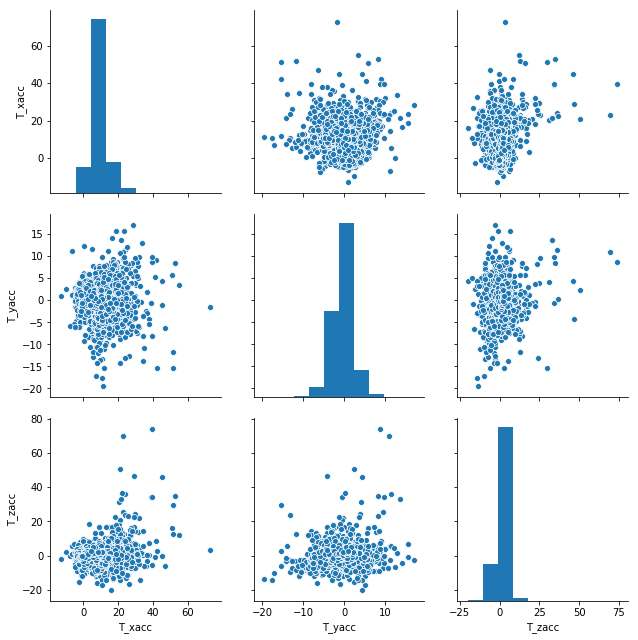

In [245]:
torso_basketball_acc = sns.pairplot(df19p8, height=3, vars=["T_xacc", "T_yacc", 'T_zacc'])

We can compare these graphs to what the data looks like while rotations is measured for the subject playing basketball.

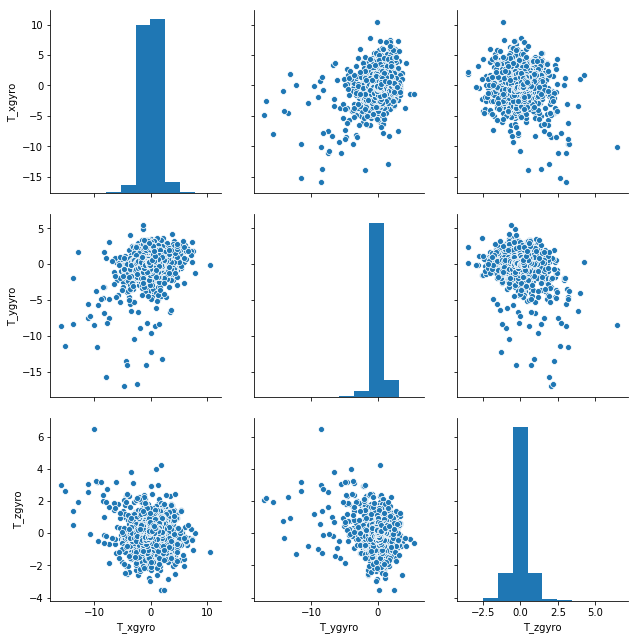

In [247]:
torso_basketball_gyro = sns.pairplot(df19p8, height=3, vars=["T_xgyro", "T_ygyro", 'T_zgyro'])

Below, we will compare our graphs to the same subject while he/she remains seated.

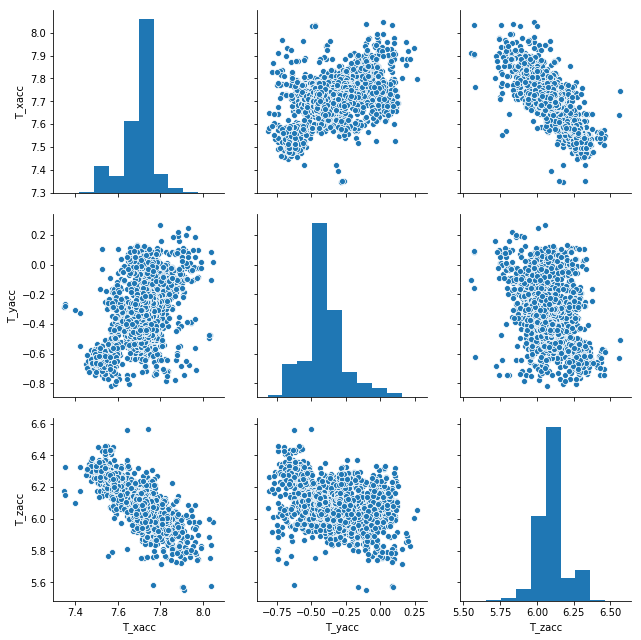

In [237]:
torso_sitting_acc = sns.pairplot(df01p8, height=3, vars=["T_xacc", "T_yacc", 'T_zacc'])

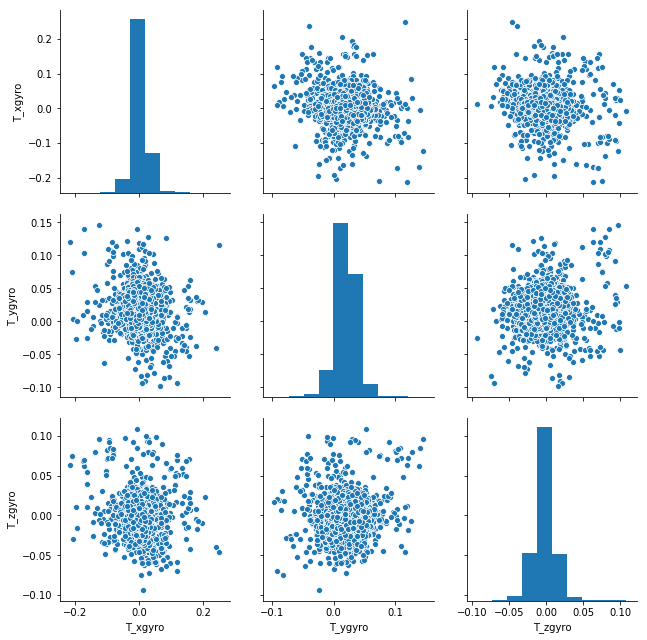

In [238]:
torso_sitting_gyro = sns.pairplot(df01p8, height=3, vars=["T_xgyro", "T_ygyro", 'T_zgyro'])

It's interesting to see that in every scatterplot has a highly concentrated center. That center may shift a little, this way or that, but there is always a substantial concentration. This makes me think that there may be clustering due to not specific type of activity (like basketball, or sitting), but something more general such as highly active, or sedentary.

Becaus we are given three axes of measurements, it would be interesting to see some more 3-dimensional modeling. As an example, let's check out what the right leg looks like while walking in a parking lot.

In [248]:
RL_treadmill = pd.DataFrame(data=df09p8, columns=["RL_xacc", "RL_yacc", 'RL_zacc'])

X = RL_treadmill['RL_xacc']
Y = RL_treadmill['RL_yacc']
Z = RL_treadmill['RL_zacc']

Text(0.5, 1.0, 'Walking in Parking Lot Accelerometer Measurements')

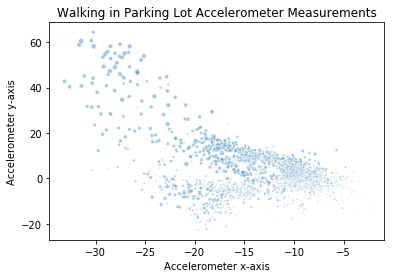

In [250]:
# Visualizing 3-D numeric data with a bubble chart
# length, breadth and size
plt.scatter(X, Y, s=Z, 
            alpha=0.4, edgecolors='w')

plt.xlabel('Accelerometer x-axis')
plt.ylabel('Accelerometer y-axis')
plt.title('Walking in Parking Lot Accelerometer Measurements')

Here we can see that the acceleration of the z-axis, or the acceleration of the earth, increases when the x-axis is negative and the y-axis is more positive. Very interesting.

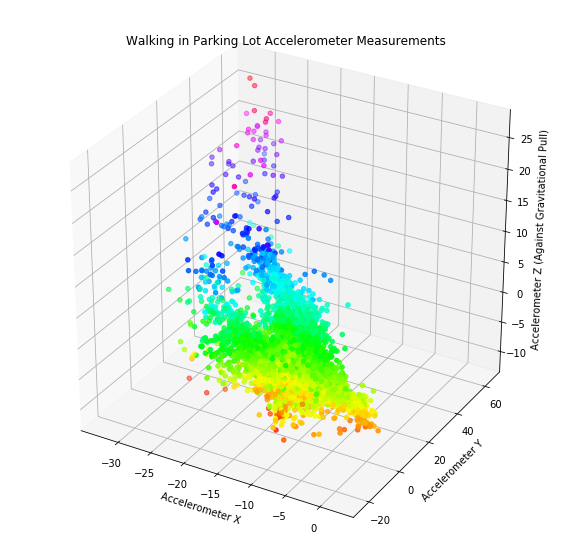

In [253]:

 
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")

z_points = Z
x_points = X
y_points = Y
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

ax.set_xlabel('Accelerometer X')
ax.set_ylabel('Accelerometer Y')
ax.set_zlabel('Accelerometer Z (Against Gravitational Pull)')

plt.title('Walking in Parking Lot Accelerometer Measurements')
plt.show()


So here we see an almost clustering effect again. There is a high concentration in the center or green, if you will. Below I'd like to load the left leg information so we can compare densities between the two legs. 

In [255]:
LL_lot = pd.DataFrame(data=df09p8, columns=["LL_xacc", "LL_yacc", 'LL_zacc'])

X2 = LL_lot['LL_xacc']
Y2 = LL_lot['LL_yacc']
Z2 = LL_lot['LL_zacc']

Text(0.5, 1.0, 'Walking in Parking Lot Accelerometer Measurements')

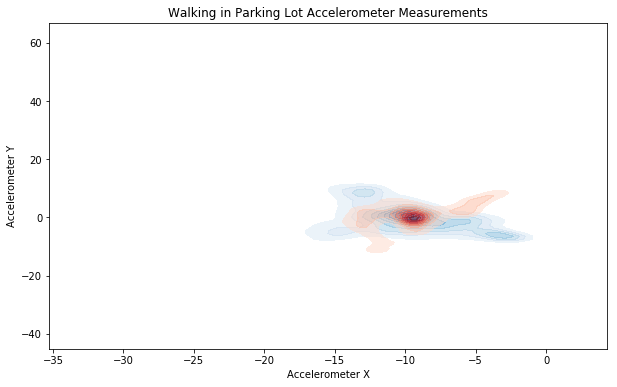

In [257]:
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(X, Y,
                  cmap="Blues", shade=True, shade_lowest=False, alpha=0.5)
ax = sns.kdeplot(X2, Y2,
                  cmap="Reds", shade=True, shade_lowest=False, alpha=0.5)

ax.set_xlabel('Accelerometer X')
ax.set_ylabel('Accelerometer Y')

plt.title('Walking in Parking Lot Accelerometer Measurements')

It's interesting to see that there is a lot more variation in the right leg movement that in the left. To make an educated guess, that is probably because more people are right side dominant. Both legs are densest in the exact same spot. Most likely, this is because they have the same neutral position mid-stride.

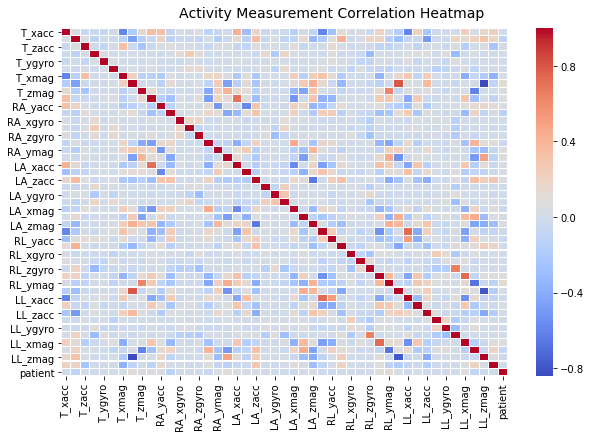

In [270]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = result.corr()
hm = sns.heatmap(round(corr,2), annot=False, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)

t= f.suptitle('Activity Measurement Correlation Heatmap', fontsize=14)

It's also interesting see how all of the features are correlated. The majority of them are fairly neutral.

## Unsupervised Modeling

When running our earlier visualizations, there were obvious concentrations or "clusters", if you will. I think it may be a better method to employing some cluster modeling. Let's begin with a simple KMeans. I've set the cluster PCA to 8 just to test.

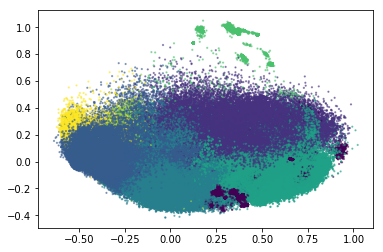

Comparing k-means clusters against the data:
activity     1      2      3      4      5      6      7      8      9   \
row_0                                                                     
0         60000      0  57294      0      4      7      0      5      0   
1             0      0   2706      0   3001   3003      0    524      1   
2             0  60000      0      0  56580  56866  52735  43850  52421   
3             0      0      0      0    411     38   7265  15595   7222   
4             0      0      0      0      4      1      0     19    239   
5             0      0      0  60000      0      0      0      4      0   
6             0      0      0      0      0      0      0      3    114   
7             0      0      0      0      0     85      0      0      3   

activity     10     11     12     13     14     15     16     17     18     19  
row_0                                                                           
0             0      0    291      0      

In [260]:
X = result.iloc[:, :46]
y = result.iloc[:, 45]
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(8).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=8, random_state=42).fit_predict(X)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, s=1.5, alpha=0.5)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [262]:
full_pred = KMeans(n_clusters=8, random_state=42).fit_predict(X_norm)

pd.crosstab(y, full_pred) 

col_0,0,1,2,3,4,5,6,7
activity,,,,,,,,
1,0,0,0,0,0,0,0,60000
2,0,0,0,60000,0,0,0,0
3,0,0,2705,0,0,57295,0,0
4,0,0,0,0,60000,0,0,0
5,526,44,3000,56395,0,0,0,35
6,53,1597,3000,55336,0,0,1,13
7,7273,1,0,52726,0,0,0,0
8,16491,12013,124,31299,3,0,2,68
9,6598,24939,0,27966,0,0,3,494


In [264]:
metrics.adjusted_rand_score(y, full_pred)

0.23276463738347863

Well, that didn't work out that well. Our ARS is pretty low at 0.23. Because this is non-flat geometry, and a large dataset, it might be better to use a MeanShift method.

In [220]:
#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X_norm,
    y,
    test_size=0.9,
    random_state=42)

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 5


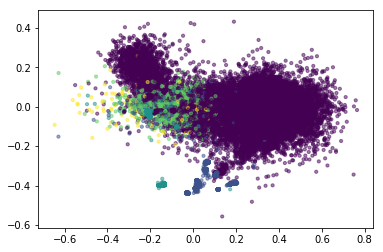

Comparing the assigned categories to the ones in the data:
col_0        0    1     2    3   4
patient                           
1        14187  793   764  182  27
2        14538  801    33  374  21
3        13756  809    32  886   1
4        14653  854    36  183  41
5        14841  729     2  210   5
6        14252   19  1504   59   3
7        14682  849    11  196  65
8        13794  887   759  150  12


In [222]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, marker='o', s=10, alpha=0.5,)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

So our MeanShift has determined this data has five clusters. Above you can see that the purple cluster overtakes the cluster plot. When thinking back to our dataset, this makes sense. Many of the activities being measured, are fairly inactive or sedentary. This product is logical, but might not be the best classification. Next we'll try an MLP Classifier to see if a neural network does a better job of classifying these activities.

In [266]:
X = result.iloc[:, :46]
y = result.iloc[:, 45]
# Normalize the data.
X_norm = normalize(X)

In [107]:
# Establish and fit the model, with a single, 40 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(40,), alpha=0.0001, max_iter=500)
mlp.fit(X_norm, y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(40,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [265]:
mlp.score(X_norm, y)

0.8802555555555556

Our mlp.score() is 0.88 which isn't half bad, but it would be better to do a GridSearch to determine what hyperparamets are best suited for our dataset. There are some computational power issues at play here because our dataset is rather large, and neural networks in general require a lot of power. Upon initial attempts, convergence warnings were issued so we will need to up our iterations dramatically. The best course of action here is to take a sampling of our data, and execute a GridSearch against that as seen below.

In [109]:
#sample the data for easier computing
result_sample=result.sample(1000)

X = result_sample.iloc[:, :46]
y_samp = result_sample.iloc[:, 45]
# Normalize the data.
X_samp = normalize(X)

In [117]:
mlp = MLPClassifier(hidden_layer_sizes=(40,), alpha=0.0001, max_iter=10000)
mlp.fit(X_samp, y_samp)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(40,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [118]:
mlp.score(X_samp, y_samp)

0.998

Wow, our mlp score is really high, which usually suggest an overfitting issue. We should use a cross-validation to see how stable our model is.

In [124]:
cross_val_score(mlp, X_samp, y_samp, cv=10)

array([0.88181818, 0.87735849, 0.87378641, 0.82178218, 0.86      ,
       0.80808081, 0.86734694, 0.83333333, 0.87234043, 0.89247312])

Double wow, that is actually pretty stable at first glance. Let's do that GridSearch we talked about to see what tweaking is needed.

In [125]:
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [10000],
}
clf = GridSearchCV(MLPClassifier(), param_grid, cv=3,
                           scoring='accuracy')
clf.fit(X_samp,y_samp)


print("Best parameters set found on development set:")
print(clf.best_params_)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found on development set:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'max_iter': 10000, 'solver': 'adam'}


OK, we have our best hyperparameters. Let's fit a new neural network to see if our results improve.

In [127]:
mlp2 = MLPClassifier(activation='tanh', learning_rate='adaptive', solver='adam', hidden_layer_sizes=(50, 50, 50), 
                    alpha=0.0001, max_iter=10000)
mlp2.fit(X_samp, y_samp)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [128]:
mlp2.score(X_samp, y_samp)

1.0

In [129]:
cross_val_score(mlp2, X_samp, y_samp, cv=10)

array([0.91818182, 0.93396226, 0.89320388, 0.87128713, 0.85      ,
       0.86868687, 0.89795918, 0.82291667, 0.89361702, 0.94623656])

Now our model has a perfect score. Could that be right? Our cross validation in this case is slightly more volatile that before, but still pretty stable. I think it would be a good idea to now take our hyperparameters and run them on the entire dataset to see what we get.

In [130]:
mlp2 = MLPClassifier(activation='tanh', learning_rate='adaptive', solver='adam', hidden_layer_sizes=(50, 50, 50), 
                    alpha=0.0001, max_iter=10000)
mlp2.fit(X_norm, y)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [131]:
mlp2.score(X_norm, y)

0.9795444444444444

In [267]:
cross_val_score(mlp2, X_norm, y, cv=3)

array([0.89157857, 0.85798333, 0.88934762])

Well, after all that work, it seems our neural network really is the most stable. We have a good mlp score, as well as a stable cross-validation score. The neural network is definitely doing a better job of classification compared to our clustering models.

 ## Conclusion

This dataset was extremely complex and a little difficult for the layperson to follow. It would be very interesting to consult a physicist or exercise physiologist to better understand the measurements that are being taken. As far as an unsupervised learning model, the neural network definitely did a great job of classifying the activities. This is pretty amazing considering the numerical data is not extremely varied.